In [1]:
import cPickle as pickle
from download_songs import BinacaYear, Song
import glob
import collections
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from nltk.tokenize import word_tokenize

In [2]:
def analyse(by):
    word_list = collections.defaultdict(float)
    
    for song in by.songs:
        tokens = word_tokenize(song.lyrics)
        for word in tokens:
            word_list[word] += 1
    
    total_words = sum(word_list.values())
    word_list = {k: v/total_words for k, v in word_list.iteritems()}
    return word_list


In [12]:
binaca_year = {}
for i in glob.glob("./songs/*.p"):
    binaca_year[int(i[-6:-2])] = pickle.load(open(i, "rb"))


In [16]:
binaca_dict = {}
for year in binaca_year.keys():
    binaca_dict[year] = analyse(binaca_year[year])


In [21]:
vocab = set()
for keys in binaca_dict.values():
    for i in keys.keys():
        vocab.add(i)
vocab = list(vocab)

In [23]:
len(vocab)

12433

In [24]:
def combine_dict(year_range):
    d = collections.defaultdict(float)
    for year in year_range:
        for k, v in binaca_dict[year].iteritems():
            d[k] += v
    return d

def get_top_n_words(n, year_range):
    d = combine_dict(year_range)
    m = [[v, k] for k, v in d.iteritems()]
    m.sort(reverse=True)
    return set(map(lambda i: i[1], m[n]))

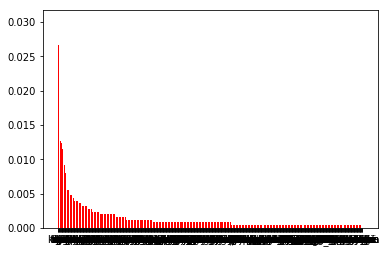

In [26]:
d = binaca_dict[1954]
m = [(v, k) for k, v in d.iteritems()]
m.sort(reverse=True)
x = range(len(m))
plt.bar(x, map(lambda i: i[0], m), 1/1.5, color="Red")
plt.xticks(x, map(lambda i: i[1], m))
plt.show()

In [8]:
#see how words changed over time

s_v = slice(100, 200)
seta = get_top_n_words(s_v, range(1955, 1965))
setb = get_top_n_words(s_v, range(1973, 1983))

for i in seta:
    if i not in setb:
        print i, ',',
print
print '-' * 81

for i in setb:
    if i not in seta:
        print i, ',',
print

bhee , mila , maine , jara , koyi , leke , jaago , aaye , bat , magar , sang , chaand , bahar , ban , gagan , haay , diya , naam , allah , nain , are , najar , sun , ichak , kyaa , phul , ruk , kee , kaun , bol , haa , chand , rang , diye , zindagi , bhayo , toh , tumhe , kahe , mora , more , manzil , yaha , yahi , chup , gayo , ram , haye , kyo , hamara , karu , sab , is , in , kuch , hame , sar , khabar , hindustani , jaha , barse , kah , jiya , kiya , jaise , bade , sa , tha ,
---------------------------------------------------------------------------------
raja , mehbuba , chori , hath , mile , ga , nahin , jay , hay , jaa , jayenge , kisi , maar , mujhko , apne , du , bas , jaana , sanam , milan , ru , aate , jaate , bole , dekha , jate , jata , jaan , chor , bhai , bhar , dono , prem , tujhe , kahi , jana , chaahiye , jhum , piya , gori , he , apna , ma , aao , aai , aap , kahaan , zara , badal , chale , raha , rahe , aha , karo , saath , mil , hoo , shaadi , nam , jivan , mat , 

In [49]:
popular_words = ['dil','pyar', 'pyaar', 'prem', 'premi', 'love', 'pal' , 'aankhein', 'zindagi', 'jindagi', 'khuda', 'allah','ankhein' ,
                 'muhabbat', 'mohabbat' , 'ishq', 'isk','jaan', 'jism', 'tadap', 'jaanam', 'dushman', 'dost', 'kamar', 'dewaana', 'dewana', 
                 'awara', 'aawara', 'awaara', 'juda', 'judaa', 'judai', 'yara','hijr', 'sanam', 'soniye', 'piya', 'nain', 'nayan', 'jawani', 'gori',
                 'pyasa', 'gore'
                 'husn', 'sundar', 'noor','rang', 'paisa', 'gaadi','car','ghar', 'bangla', 'sawan', 'saawan', 'gagan', 'asmaan',
                 'ladki', 'raja', 'rani', 'yaad', 'baarish', 'barshaat', 'barshat', 'maa', 'hum', 'tum', 'mai', 'tu', 
                 'chaand' , 'shadi', 'shaadi', 'zulfe', 'haseena', 'ajnavi', 'ajnabi' ,'haseen', 'aashiquee', 'aasique',
                 'aashiq', 'aasik', 'ashiq', 'ashiqui','mulakat', 'aansu' , 'ask', 'asq', 'himmat','janeman', 'jaanwar','jaanvar', 'saath', 
                 'jivan', 'jeevan', 'phool', 'phul', 'mausam', 'jamana', 'chaand', 'chand', 'khabar', 'sajda', 'fiza', 
                 'hawa', 'aalam', 'alam', 'lamha', 'nasha', 'sharabi', 'sharab', 'sarab', 'rubaroo', 'rubaru', 'arzoo',
                 'khusi', 
                ]


for i in popular_words:
    d = combine_dict(range(1965,1975))
    print i, d[i]

dil 0.0947869734443
pyar 0.0560004905994
pyaar 0.0257708943956
prem 0.00380169757074
premi 0.000660178158065
love 0.00239748887422
pal 0.00541753883732
aankhein 0.0
zindagi 0.00893450136488
jindagi 0.00397904580032
khuda 0.00314859585769
allah 0.00165616271691
ankhein 0.0
muhabbat 0.00387457827143
mohabbat 0.0189850623375
ishq 0.00217712725276
isk 0.000136798905609
jaan 0.0104670401606
jism 0.000272929210627
tadap 0.00123557687795
jaanam 0.0
dushman 0.00245702221736
dost 0.00136190077381
kamar 0.00119838221226
dewaana 0.0
dewana 0.0
awara 0.000278629144609
aawara 0.000152253349574
awaara 0.0
juda 0.00161337835175
judaa 0.000529224308122
judai 0.000273336071764
yara 0.0
hijr 0.0
sanam 0.00636469535126
soniye 0.000125297581757
piya 0.00862731788463
nain 0.00252654666036
nayan 0.000875341747273
jawani 0.00684060813936
gori 0.00887474561007
pyasa 0.00163644232604
gorehusn 0.0
sundar 0.000822165829962
noor 0.000124890720619
rang 0.00964930619035
paisa 0.00103699909622
gaadi 0.00270336850069

In [30]:
import sys
sys.path.insert(0, "/home/harshil/Apps/faiss/")
import faiss

ImportError: No module named faiss

In [10]:
year_data = np.zeros([len(binaca_dict.keys()), len(vocab)]).astype('float32')

word_key = dict()
for i, val in enumerate(vocab):
    word_key[val] = i

for year in binaca_year.keys():
    for k, v in binaca_dict[year].iteritems():
        year_data[year-min(binaca_dict.keys())][word_key[k]] = float(v)

year_data = np.ascontiguousarray(year_data.T)

In [11]:
k = 10
index = faiss.IndexFlatL2(year_data.shape[1])
index.add(year_data)
D, I = index.search(year_data, k+1)
pickle.dump(I, open('indexes.p', 'wb+'))

In [7]:
I = pickle.load(open('indexes.p', 'rb+'))

In [8]:
import networkx as nx
G=nx.Graph()
G.add_nodes_from(range(len(vocab)))

for i in range(len(vocab)):
    for j in I[i]:
        if j == i:
            continue
        G.add_edge(i, j)

In [9]:
def print_i(j):
    print vocab[j]
    for i in G.neighbors(j):
        print vocab[i],

print_i(1732)

hindustani
desh dir rona radhika bhigi abhi dadi-amma madhuban saval nasha


In [10]:
from sklearn.cluster import SpectralClustering
from sklearn import metrics

In [28]:
vocab.index('hindustani')

1732

In [29]:
adj_mat = nx.to_numpy_matrix(G)
sc = SpectralClustering(100, affinity='precomputed', eigen_solver='arpack')
sc.fit(adj_mat)

print('spectral clustering')
print(sc.labels_)

NameError: name 'nx' is not defined

In [13]:
pickle.dump(sc, open('sc.p', 'wb+'))